### 微分方程式の数値解法

微分を差分で置き換えて、漸化式を作る。例は最も単純なEuler法を使い、より精度の高い方法についてはライブラリを用いる。
$$
\frac{dx}{dt} = px 
$$
時間を幅$\Delta t$に分割して離散化する。$t_n=n\Delta t (n=1,\cdots , N)$する。
時刻$t_n$におけるxの値を数列$x_n$で表す。
$$x_n = x(t_n) = x(n\Delta t)$$
微分方程式に含まれる微分を差分で表す。
$$
\frac{dx}{dt} = \frac{x(t+\Delta t)-x(t)}{\Delta t} \rightarrow \frac{x_{n+1}-x_n}{\Delta t}
$$
$$
\frac{x_{n+1}-x_n}{\Delta t} = px_n \rightarrow x_{n+1} = x_n + p x_n \Delta t
$$
1階の微分方程式は2項間の漸化式になるので、初期条件を与えれば、順次数値を求めることができる。

Text(0, 0.5, 'x')

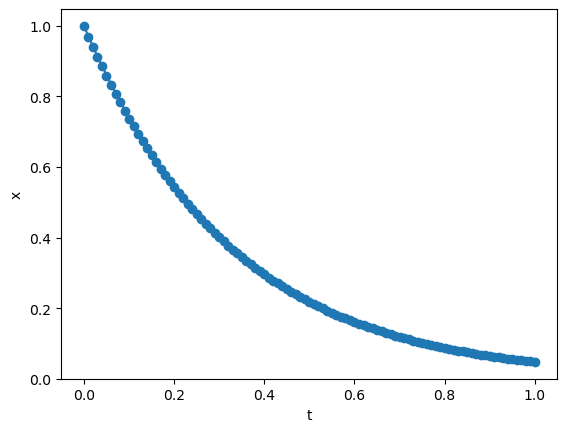

In [8]:
#
import matplotlib.pyplot as plt 
import numpy as np 

p = -3
N = 100
delta = 1/N
x0 = 1
t = 0
T = [t]
X = [x0]
for i in range(N):
    t = t + delta
    x = x0 + p*x0*delta 
    T.append(t)
    X.append(x)
    x0 = x 
t = np.linspace(0, 1, N)
y = np.exp(p*t)
plt.scatter(T, X)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('x')




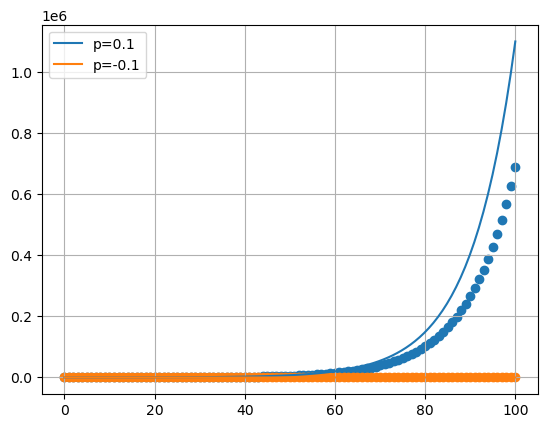

In [21]:
y0 = 50
N = 100
delta = 100/N
t = np.linspace(0, 100, N)
y1 = y0*np.exp(0.1*t)
y2 = y0*np.exp(-0.1*t)


def solve(y0, p):
    t = 0
    y = y0
    T = [t]
    Y = [y]
    for i in range(N):
        y += p*y*delta
        t += delta 
        T.append(t)
        Y.append(y)
    plt.scatter(T, Y)
    #plt.show()
solve(y0, 0.1)
solve(y0, -0.1)
plt.plot(t, y1, label='p=0.1')
plt.plot(t, y2, label='p=-0.1')
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()


微分方程式を精度よく解くためのライブラリはscipy.integrate にあり、solve_ivp (initial value problem) が使える。 
[scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)

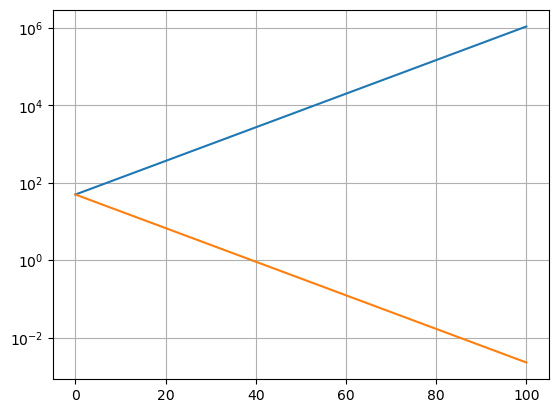

In [30]:
from scipy.integrate import solve_ivp

def dydt(t, y, p): return p*y
t0 = 0
tmax = 100
y0 = 50
T = np.linspace(0, 100)
sol1 = solve_ivp(dydt, [t0, tmax], [y0], t_eval=T, args=(0.1,))
sol2 = solve_ivp(dydt, [t0, tmax], [y0], t_eval=T, args=(-0.1,))
plt.plot(sol1.t, sol1.y[0])
plt.plot(sol2.t, sol2.y[0])
plt.yscale('log')
plt.grid()

### 課題２　落体の運動
速度に比例する抵抗力を受けながら落下する物体の速度および位置の時間変化を求める。ただし、$m=0.2$ kg, g=9.8 $m/s^2$
座標は鉛直下向きを正とし、抵抗力の比例定数を$k$とすると、運動方程式は
$$
m\frac{dv}{dt} = mg -kv
$$
$$v(t+\Delta t) = v(t) + \left(g-\frac{k}{m}v(t)\right)\Delta t
$$
$$
v_{n+1} = v_{n} + (g-\frac{k}{m}v_n)\times \Delta t
$$
速度の定義は
$$
\frac{dy}{dt} = v \rightarrow y(t+\Delta t) -y(t) = v(t)\Delta t \rightarrow y_{n+1} = y_n + v_n \Delta t
$$


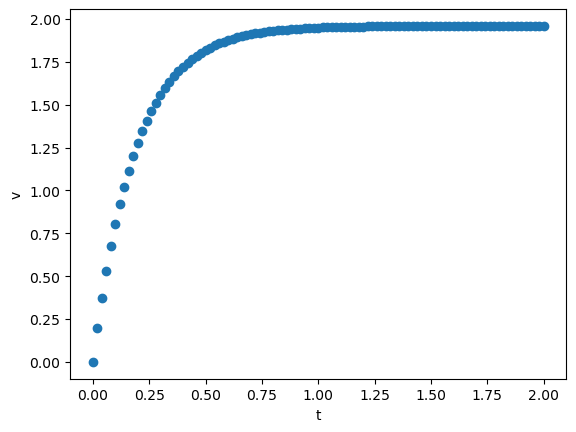

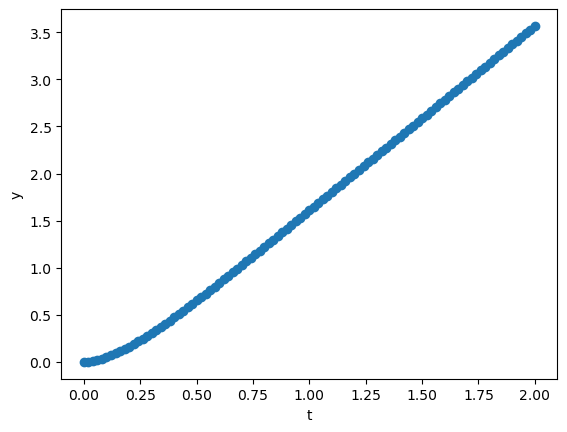

In [35]:
g = 9.8
m = 0.2
dt = 1/50
t0 = 0
tmax = 2
N = int(tmax / dt) 
t = 0
v = 0
k = 1
y = 0
T = [t]
V = [v]
Y = [y]
for i in range(N):
    t += dt 
    v += (g-k/m*v)*dt
    y += v*dt 
    V.append(v)
    T.append(t)
    Y.append(y)
plt.scatter(T, V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()
plt.scatter(T, Y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()